# Stock Market CBOE VIX Analysis and Prediction using LSTM

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Reading the dataset

In [53]:
data= pd.read_csv('flat-ui__data.csv')
data.head()

,DATE,OPEN,HIGH,LOW,CLOSE
0,03/22/2024,12.92,13.15,12.58,13.06
1,03/21/2024,12.98,13.08,12.40,12.92
2,03/20/2024,13.83,14.17,13.01,13.04
3,03/19/2024,14.50,14.86,13.80,13.82
4,03/18/2024,14.75,14.85,14.26,14.33


In [54]:
data.dtypes

DATE      object
OPEN     float64
HIGH     float64
LOW      float64
CLOSE    float64
dtype: object

In [55]:
data['DATE'] = pd.to_datetime(data['DATE'])

In [56]:
data.dtypes

DATE     datetime64[ns]
OPEN            float64
HIGH            float64
LOW             float64
CLOSE           float64
dtype: object

In [57]:
data.describe()

,OPEN,HIGH,LOW,CLOSE
count,8632.000000,8632.000000,8632.000000,8632.000000
mean,19.629685,20.435451,18.880280,19.543306
std,7.967062,8.427376,7.458714,7.894811
min,9.010000,9.310000,8.560000,9.140000
25%,13.920000,14.500000,13.390000,13.840000
50%,17.740000,18.410000,17.145000,17.700000
75%,23.062500,23.922500,22.272500,22.942500
max,82.690000,89.530000,72.760000,82.690000


In [58]:
data.head()

,DATE,OPEN,HIGH,LOW,CLOSE
0,2024-03-22,12.92,13.15,12.58,13.06
1,2024-03-21,12.98,13.08,12.40,12.92
2,2024-03-20,13.83,14.17,13.01,13.04
3,2024-03-19,14.50,14.86,13.80,13.82
4,2024-03-18,14.75,14.85,14.26,14.33


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8632 entries, 0 to 8631
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    8632 non-null   datetime64[ns]
 1   OPEN    8632 non-null   float64       
 2   HIGH    8632 non-null   float64       
 3   LOW     8632 non-null   float64       
 4   CLOSE   8632 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 337.3 KB


In [60]:
data.isnull().sum()

DATE     0
OPEN     0
HIGH     0
LOW      0
CLOSE    0
dtype: int64

In [61]:
data.duplicated().sum()

0

In [62]:
data['DATE'].sort_values()

8631   1990-01-02
8630   1990-01-03
8629   1990-01-04
8628   1990-01-05
8627   1990-01-08
          ...    
4      2024-03-18
3      2024-03-19
2      2024-03-20
1      2024-03-21
0      2024-03-22
Name: DATE, Length: 8632, dtype: datetime64[ns]

In [63]:
data_24 = data[ data['DATE'].dt.year == 2024]

<Axes: xlabel='DATE'>

<Figure size 2000x1500 with 0 Axes>

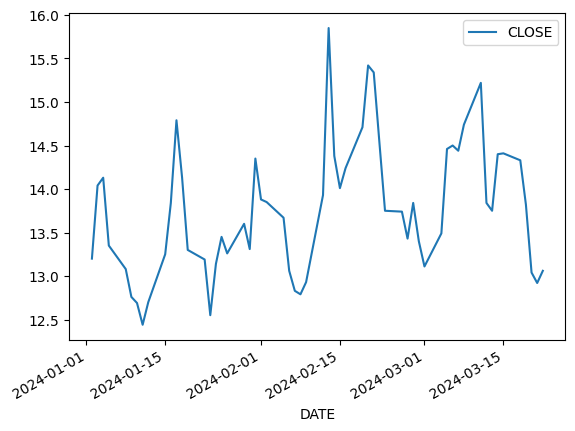

In [64]:
plt.figure(figsize=(20, 15))
data_24.plot(x = 'DATE', y= 'CLOSE')

<Axes: xlabel='DATE'>

<Figure size 2000x1500 with 0 Axes>

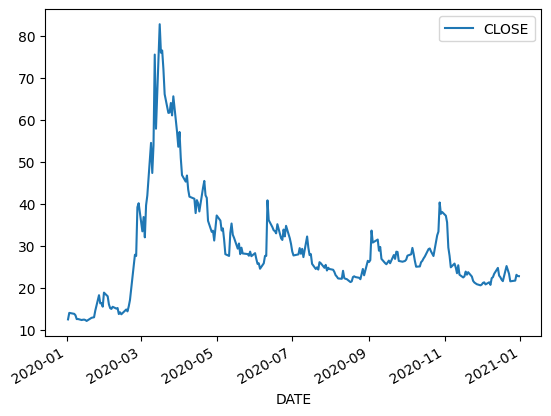

In [65]:
data_CV = data[ data['DATE'].dt.year == 2020]
plt.figure(figsize=(20, 15))
data_CV.plot(x = 'DATE', y= 'CLOSE')

<Axes: >

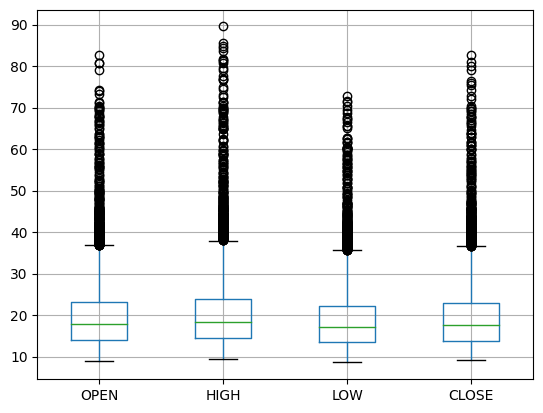

In [66]:
data.boxplot()

<Axes: title={'center': 'Close'}, ylabel='Frequency'>

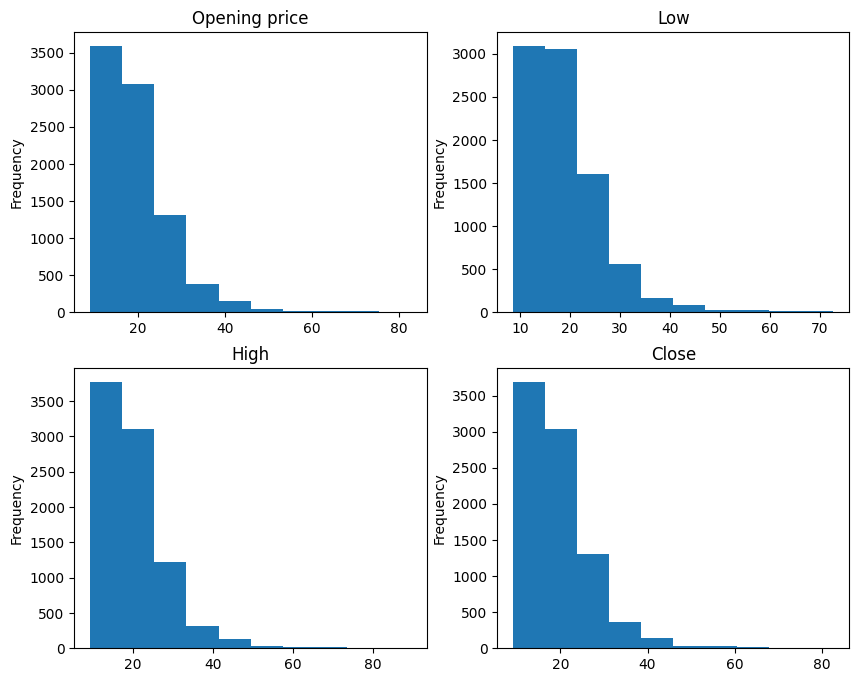

In [67]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot each column in a separate subplot
data['OPEN'].plot(ax=axes[0, 0], kind='hist', title='Opening price')
data['LOW'].plot(ax=axes[0, 1], kind='hist', title='Low')
data['HIGH'].plot(ax=axes[1, 0], kind='hist', title='High')
data['CLOSE'].plot(ax=axes[1, 1], kind='hist', title='Close')

C:\Users\hanin\AppData\Local\Temp\ipykernel_54880\3687961231.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='summer', fmt = '.3f')


<Axes: >

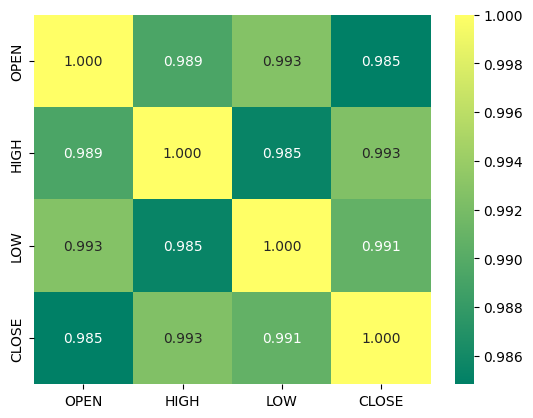

In [68]:
sns.heatmap(data.corr(), annot=True, cmap='summer', fmt = '.3f')

In [69]:
X= data.iloc[:, 1:-1]
Y = data['CLOSE']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.3, random_state=42)

In [71]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (X_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [72]:
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=15, batch_size=64,validation_data=(X_test, y_test))

Epoch 1/15
95/95 [==============================] - 3s 12ms/step - loss: 120.9641 - val_loss: 60.6442
Epoch 2/15
95/95 [==============================] - 1s 7ms/step - loss: 35.1019 - val_loss: 9.7448
Epoch 3/15
95/95 [==============================] - 1s 7ms/step - loss: 5.5835 - val_loss: 3.6191
Epoch 4/15
95/95 [==============================] - 1s 8ms/step - loss: 2.5962 - val_loss: 1.8690
Epoch 5/15
95/95 [==============================] - 1s 8ms/step - loss: 1.4737 - val_loss: 1.2045
Epoch 6/15
95/95 [==============================] - 1s 7ms/step - loss: 1.0808 - val_loss: 1.0824
Epoch 7/15
95/95 [==============================] - 1s 7ms/step - loss: 0.8627 - val_loss: 1.3092
Epoch 8/15
95/95 [==============================] - 1s 7ms/step - loss: 0.7500 - val_loss: 0.8528
Epoch 9/15
95/95 [==============================] - 1s 7ms/step - loss: 0.7484 - val_loss: 0.7022
Epoch 10/15
95/95 [==============================] - 1s 8ms/step - loss: 0.6932 - val_loss: 1.0631
Epoch 11/15
95

In [73]:
MSE = model.evaluate(X_test, y_test)
print("Test Loss:", MSE)

81/81 [==============================] - 0s 2ms/step - loss: 0.7164
Test Loss: 0.7163808941841125


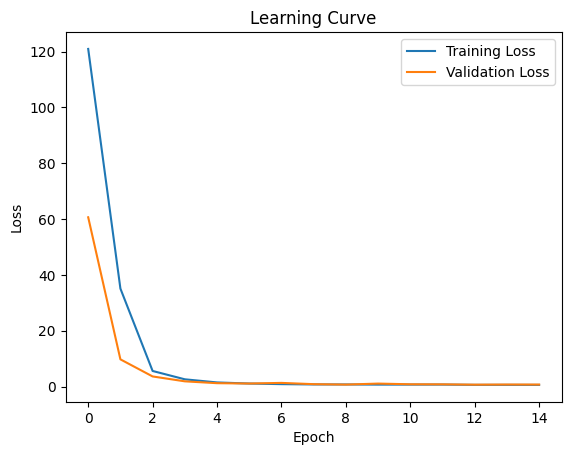

In [74]:

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [75]:

# Convert the data to a numpy array
x_test = X_test.to_numpy()
y_test = y_test.to_numpy()
# Get the models predicted price values 
predictions = model.predict(X_test)
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

81/81 [==============================] - 1s 2ms/step


11.235186514570758

In [80]:
predictions.shape, type(predictions)

((2590, 1), numpy.ndarray)

In [81]:
predictions

array([[13.837776],
       [22.842577],
       [17.390179],
       ...,
       [13.690026],
       [13.111379],
       [35.5308  ]], dtype=float32)

In [82]:
pred = []
for i in predictions:
    for j in i :
        pred.append(j)
print(pred)

[13.837776, 22.842577, 17.390179, 17.849623, 29.810163, 21.381605, 18.70379, 24.866926, 17.612217, 12.645929, 15.0939045, 17.500694, 15.050462, 9.779855, 12.952454, 17.83811, 29.672178, 16.739344, 65.35477, 12.728579, 10.605968, 24.410618, 20.379808, 16.812088, 20.01855, 12.473593, 41.67625, 9.965811, 11.628634, 29.616228, 33.2666, 20.092585, 14.898678, 19.236797, 13.750371, 26.150196, 22.29053, 17.842058, 23.551502, 13.9406595, 14.898926, 10.132052, 11.817571, 11.610583, 21.76852, 13.996736, 12.206118, 18.617977, 25.824497, 14.31922, 37.038914, 17.159124, 16.129416, 26.924091, 11.692385, 26.970585, 23.750132, 14.833436, 25.582542, 22.209179, 19.876478, 27.418226, 15.039358, 19.511497, 24.88291, 34.33709, 23.051676, 11.917696, 12.665281, 12.690752, 13.548435, 18.929146, 20.821432, 15.488035, 22.69406, 18.023355, 12.106982, 13.717828, 13.570124, 41.96682, 15.106983, 25.422108, 36.340405, 28.387745, 15.156795, 20.235691, 12.500262, 12.914084, 25.281403, 23.687883, 17.222898, 11.500951, 3

In [83]:

values = pd.DataFrame({'Predicted': pred, 'Actual': y_test})
values

,Predicted,Actual
0,13.837776,13.49
1,22.842577,23.27
2,17.390179,16.92
3,17.849623,18.00
4,29.810163,30.22
...,...,...
2585,21.686054,22.48
2586,12.186975,12.13
2587,13.690026,13.18
2588,13.111379,13.24


<Axes: title={'center': 'Predicted closing price'}>

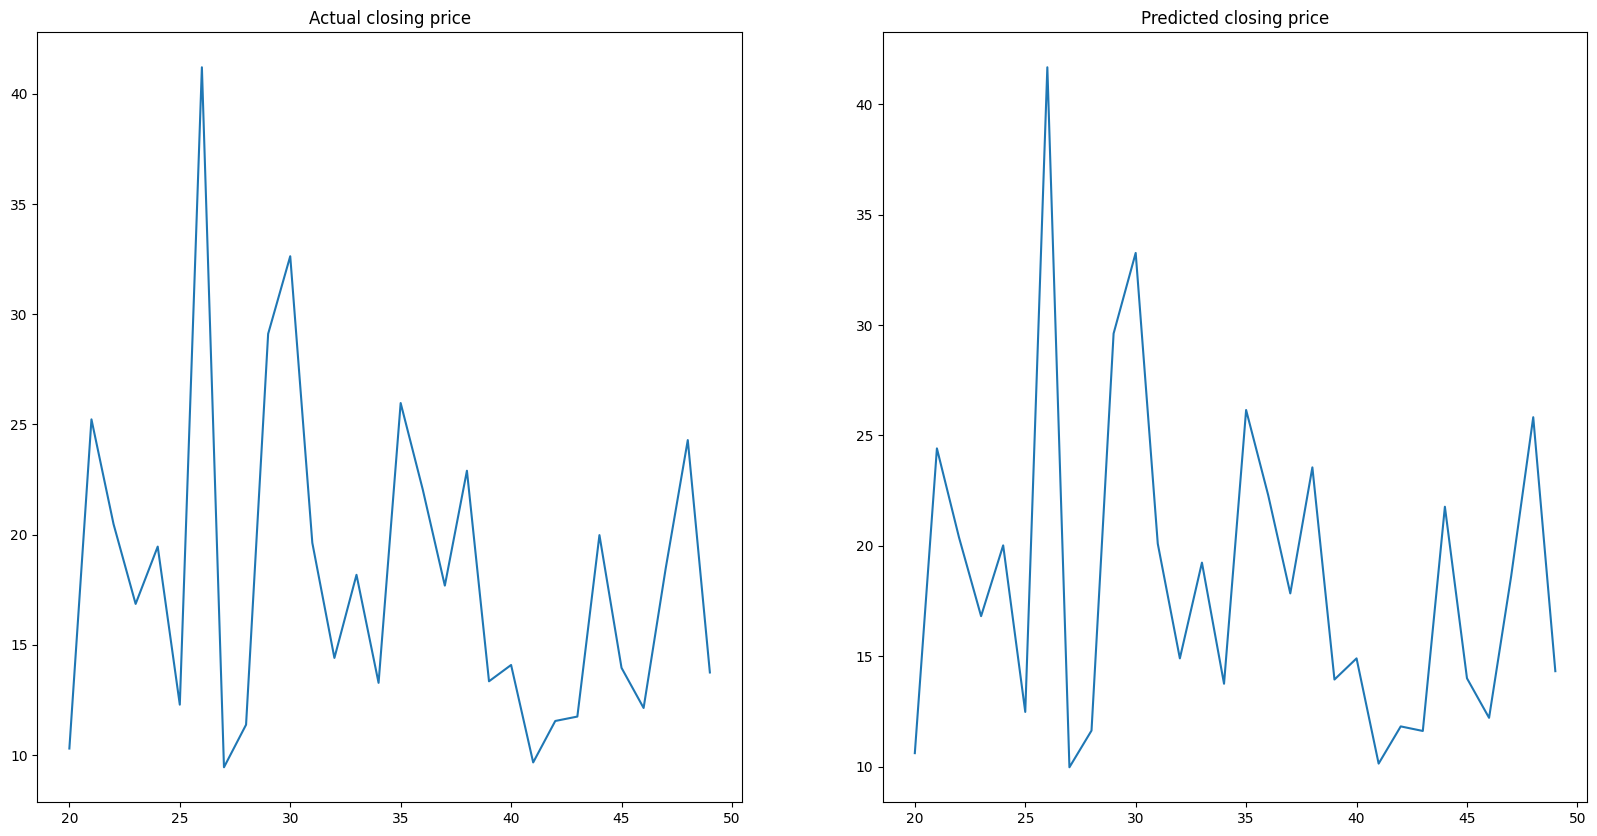

In [104]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
values['Actual'].iloc[20:50].plot(ax=axes[0], kind='line', title='Actual closing price')
values['Predicted'].iloc[20:50].plot(ax=axes[1], kind='line', title='Predicted closing price')
